# Performing Data Visualizations on Covid-19 Data 
* The Data was collected from
*https://health.data.ny.gov/Health/New-York-Forward-COVID-19-Daily-Hospitalization-Su/qutr-irdf

# Time Series :-)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.style as style
import missingno as msno
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
style.use('ggplot')

In [4]:
df = pd.read_csv('New_York_Forward_COVID-19_Daily_Hospitalization_Summary_by_Region.csv', parse_dates=['As of Date'])
df.head()

,As of Date,Region,Total Patients Hospitalized,Total Patients in ICU
0,2020-03-26,CAPITAL REGION,40,13
1,2020-03-26,CENTRAL NEW YORK,20,4
2,2020-03-26,FINGER LAKES,39,23
3,2020-03-26,LONG ISLAND,1082,303
4,2020-03-26,MID-HUDSON,493,126


In [5]:
len(df) # total number of observations, rows in the dataset

6120

In [6]:
df.isnull().sum() # total number of rows where the value is null

As of Date                     0
Region                         0
Total Patients Hospitalized    0
Total Patients in ICU          0
dtype: int64

In [9]:
df.info

<bound method DataFrame.info of      As of Date            Region  Total Patients Hospitalized  \
0    2020-03-26    CAPITAL REGION                           40   
1    2020-03-26  CENTRAL NEW YORK                           20   
2    2020-03-26      FINGER LAKES                           39   
3    2020-03-26       LONG ISLAND                         1082   
4    2020-03-26        MID-HUDSON                          493   
...         ...               ...                          ...   
6115 2021-11-28     MOHAWK VALLEY                          129   
6116 2021-11-28     NEW YORK CITY                          506   
6117 2021-11-28     NORTH COUNTRY                          113   
6118 2021-11-28     SOUTHERN TIER                          166   
6119 2021-11-28  WESTERN NEW YORK                          484   

      Total Patients in ICU  
0                        13  
1                         4  
2                        23  
3                       303  
4                       1

## Removing spaces to work with the data easier

In [10]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [23]:
df.info

<bound method DataFrame.info of      As_of_Date            Region  Total_Patients_Hospitalized  \
0    2020-03-26    CAPITAL REGION                           40   
1    2020-03-26  CENTRAL NEW YORK                           20   
2    2020-03-26      FINGER LAKES                           39   
3    2020-03-26       LONG ISLAND                         1082   
4    2020-03-26        MID-HUDSON                          493   
...         ...               ...                          ...   
6115 2021-11-28     MOHAWK VALLEY                          129   
6116 2021-11-28     NEW YORK CITY                          506   
6117 2021-11-28     NORTH COUNTRY                          113   
6118 2021-11-28     SOUTHERN TIER                          166   
6119 2021-11-28  WESTERN NEW YORK                          484   

      Total_Patients_in_ICU  month  year  day  weekday  week  weekend  
0                        13      3  2020   26        3    13    False  
1                         4    

## Visual understanding of the the total patients hospitalized

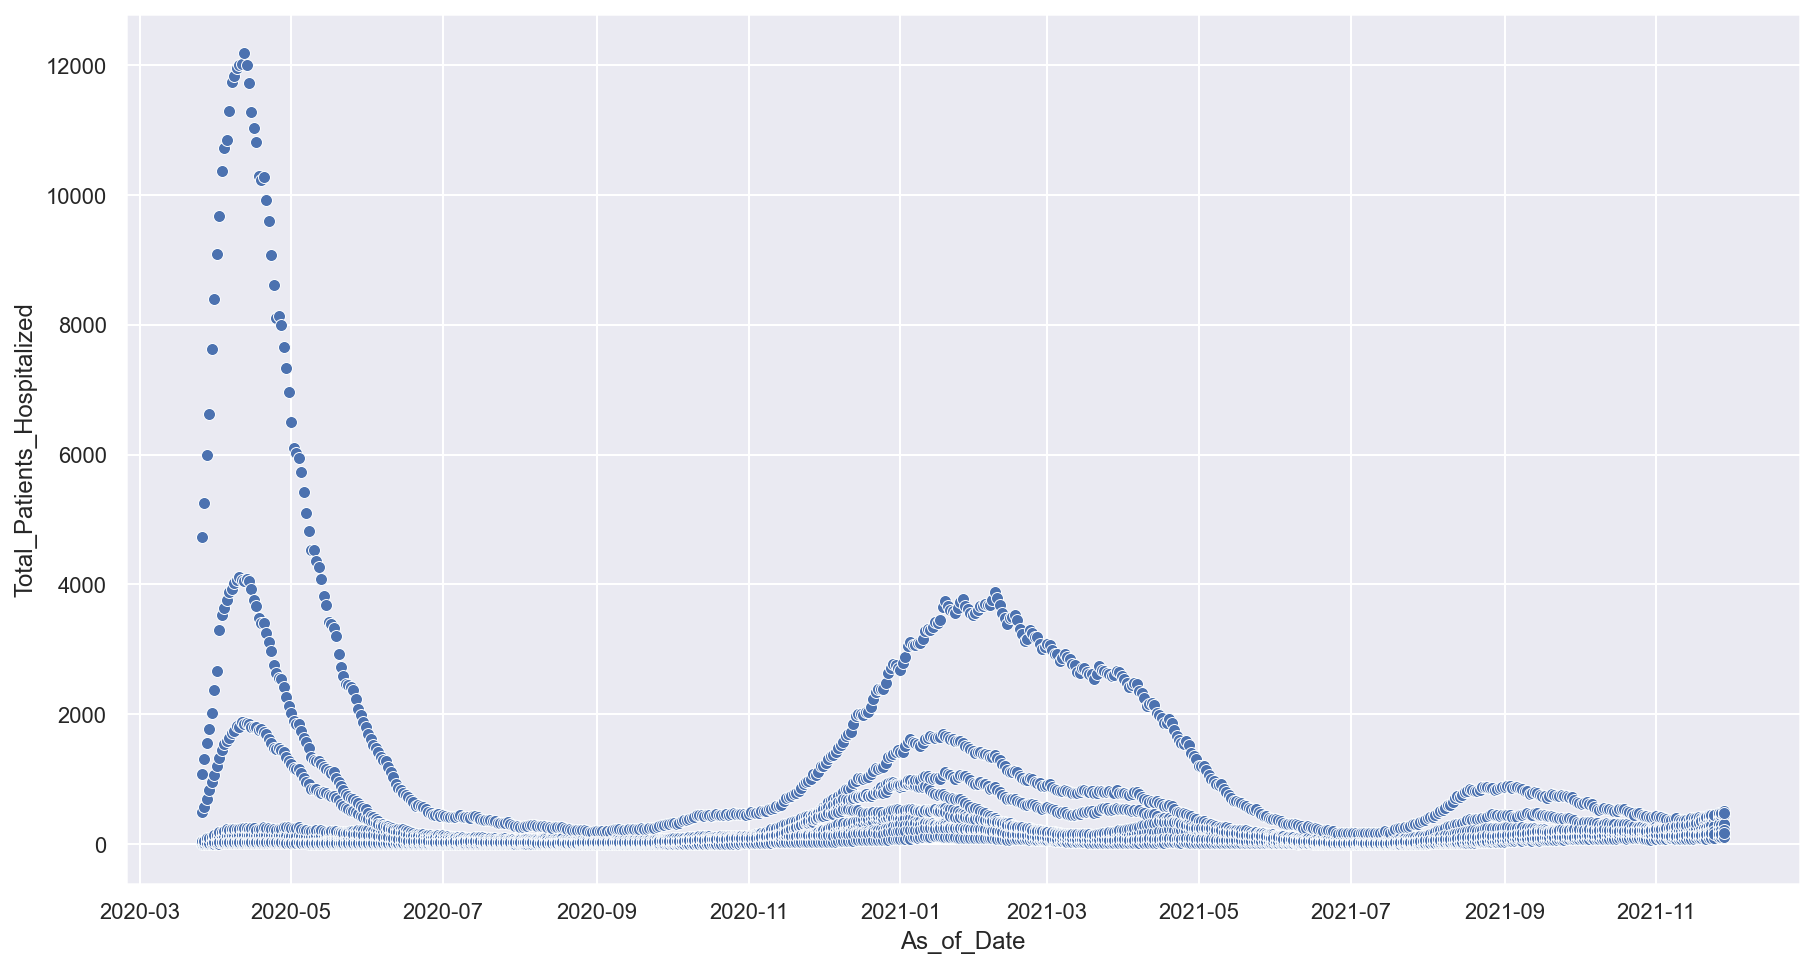

In [29]:
sns.scatterplot(x='As_of_Date', y='Total_Patients_Hospitalized', data=df)
sns.set(rc = {'figure.figsize':(20,8)})

<AxesSubplot:xlabel='Region', ylabel='Total_Patients_Hospitalized'>

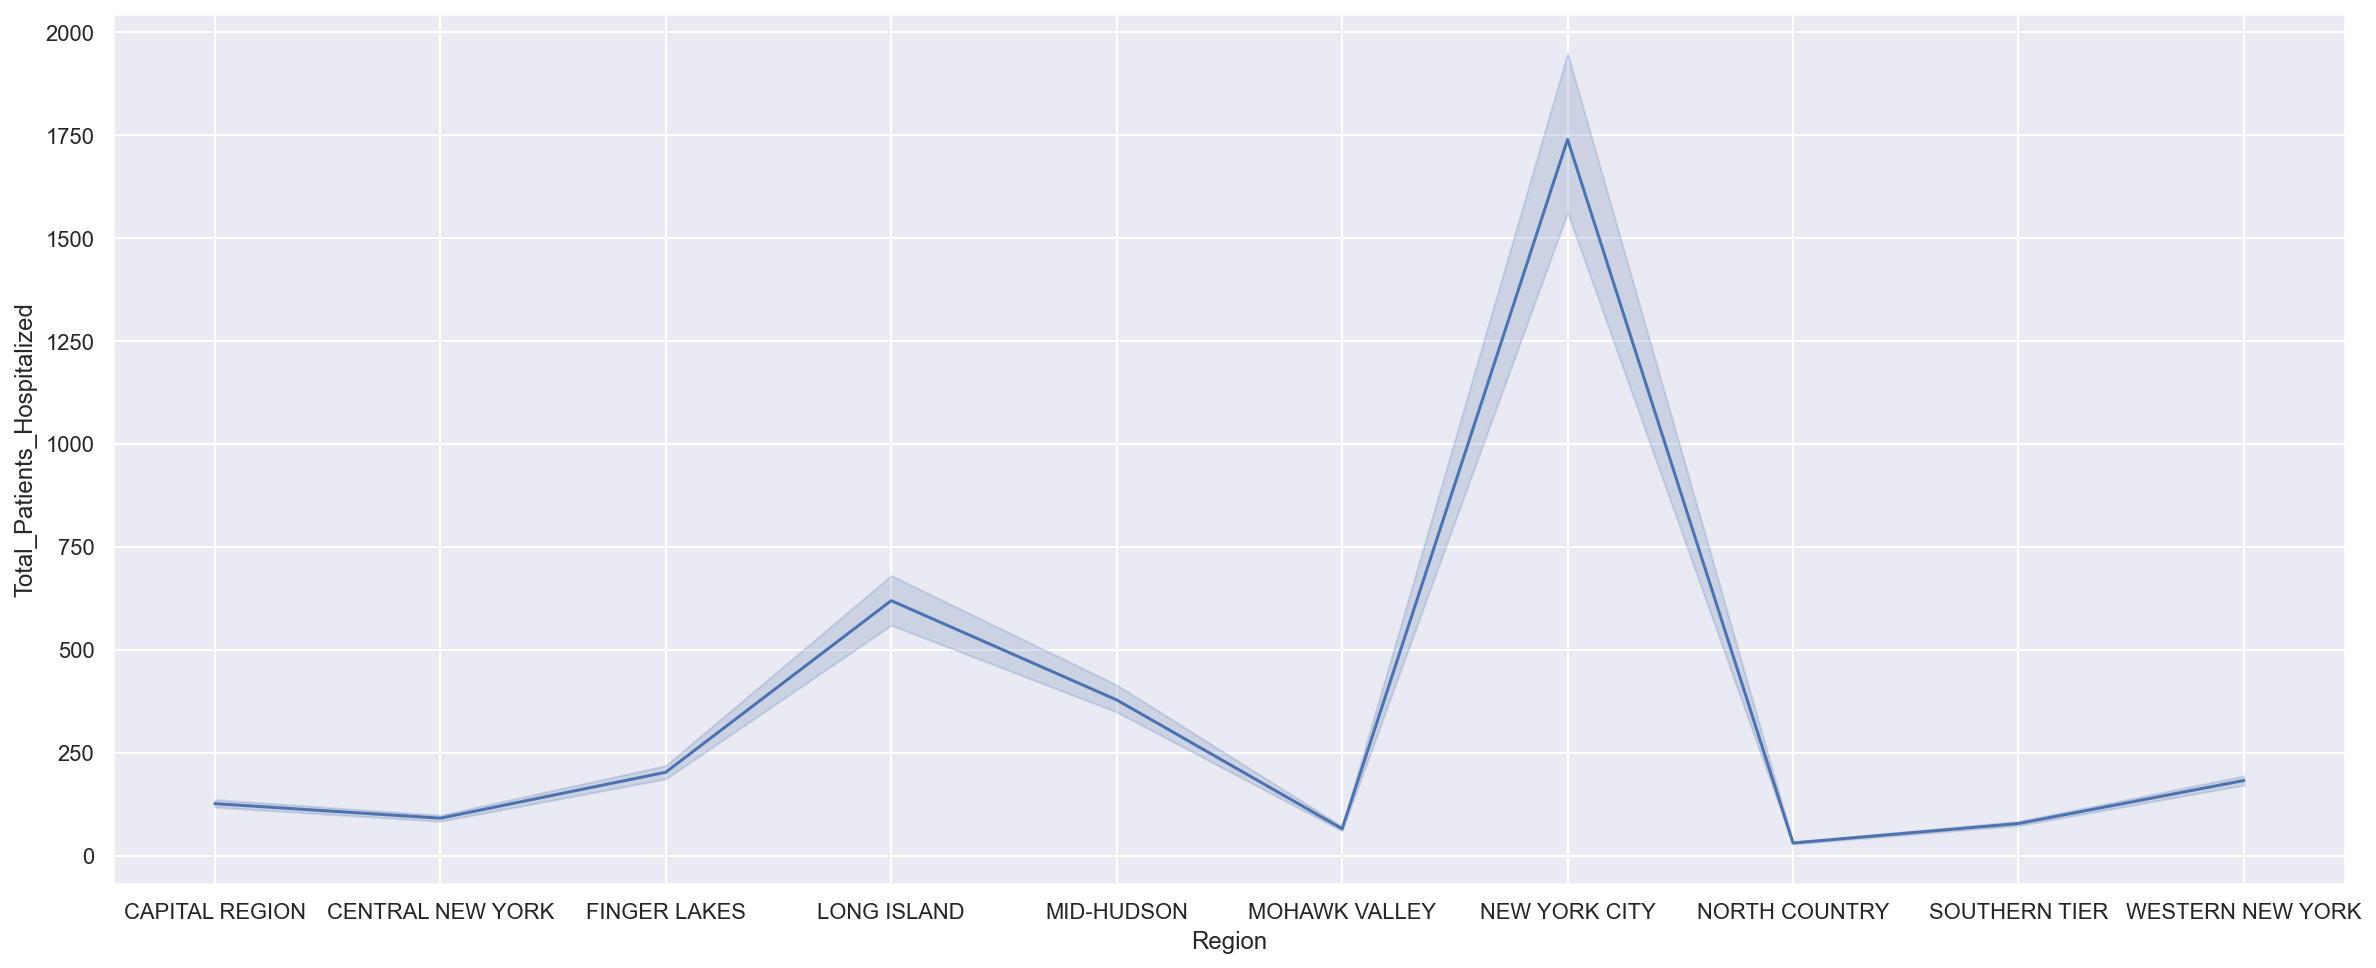

In [37]:
sns.lineplot(x='Region', y='Total_Patients_Hospitalized', data=df)

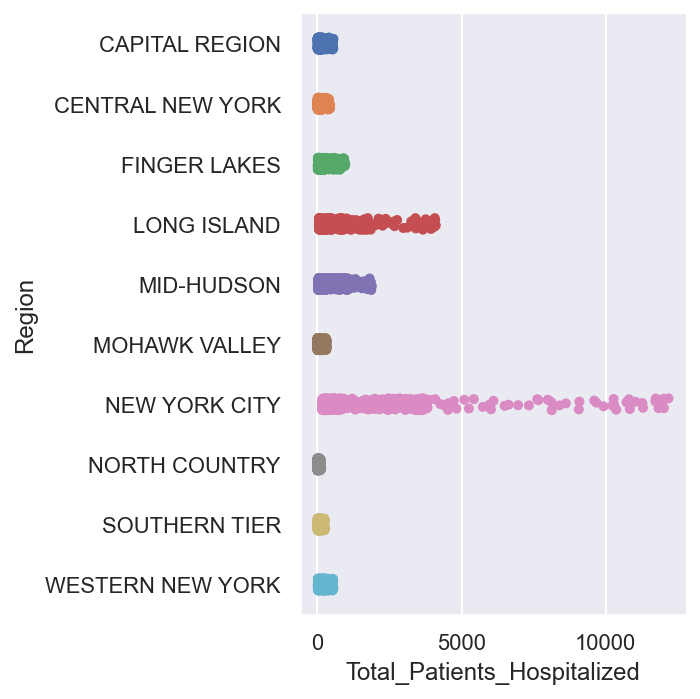

In [39]:
sns.catplot(x='Total_Patients_Hospitalized', y='Region', data=df)

## Visual understanding of the the total patients in icu

<AxesSubplot:xlabel='As_of_Date', ylabel='Total_Patients_in_ICU'>

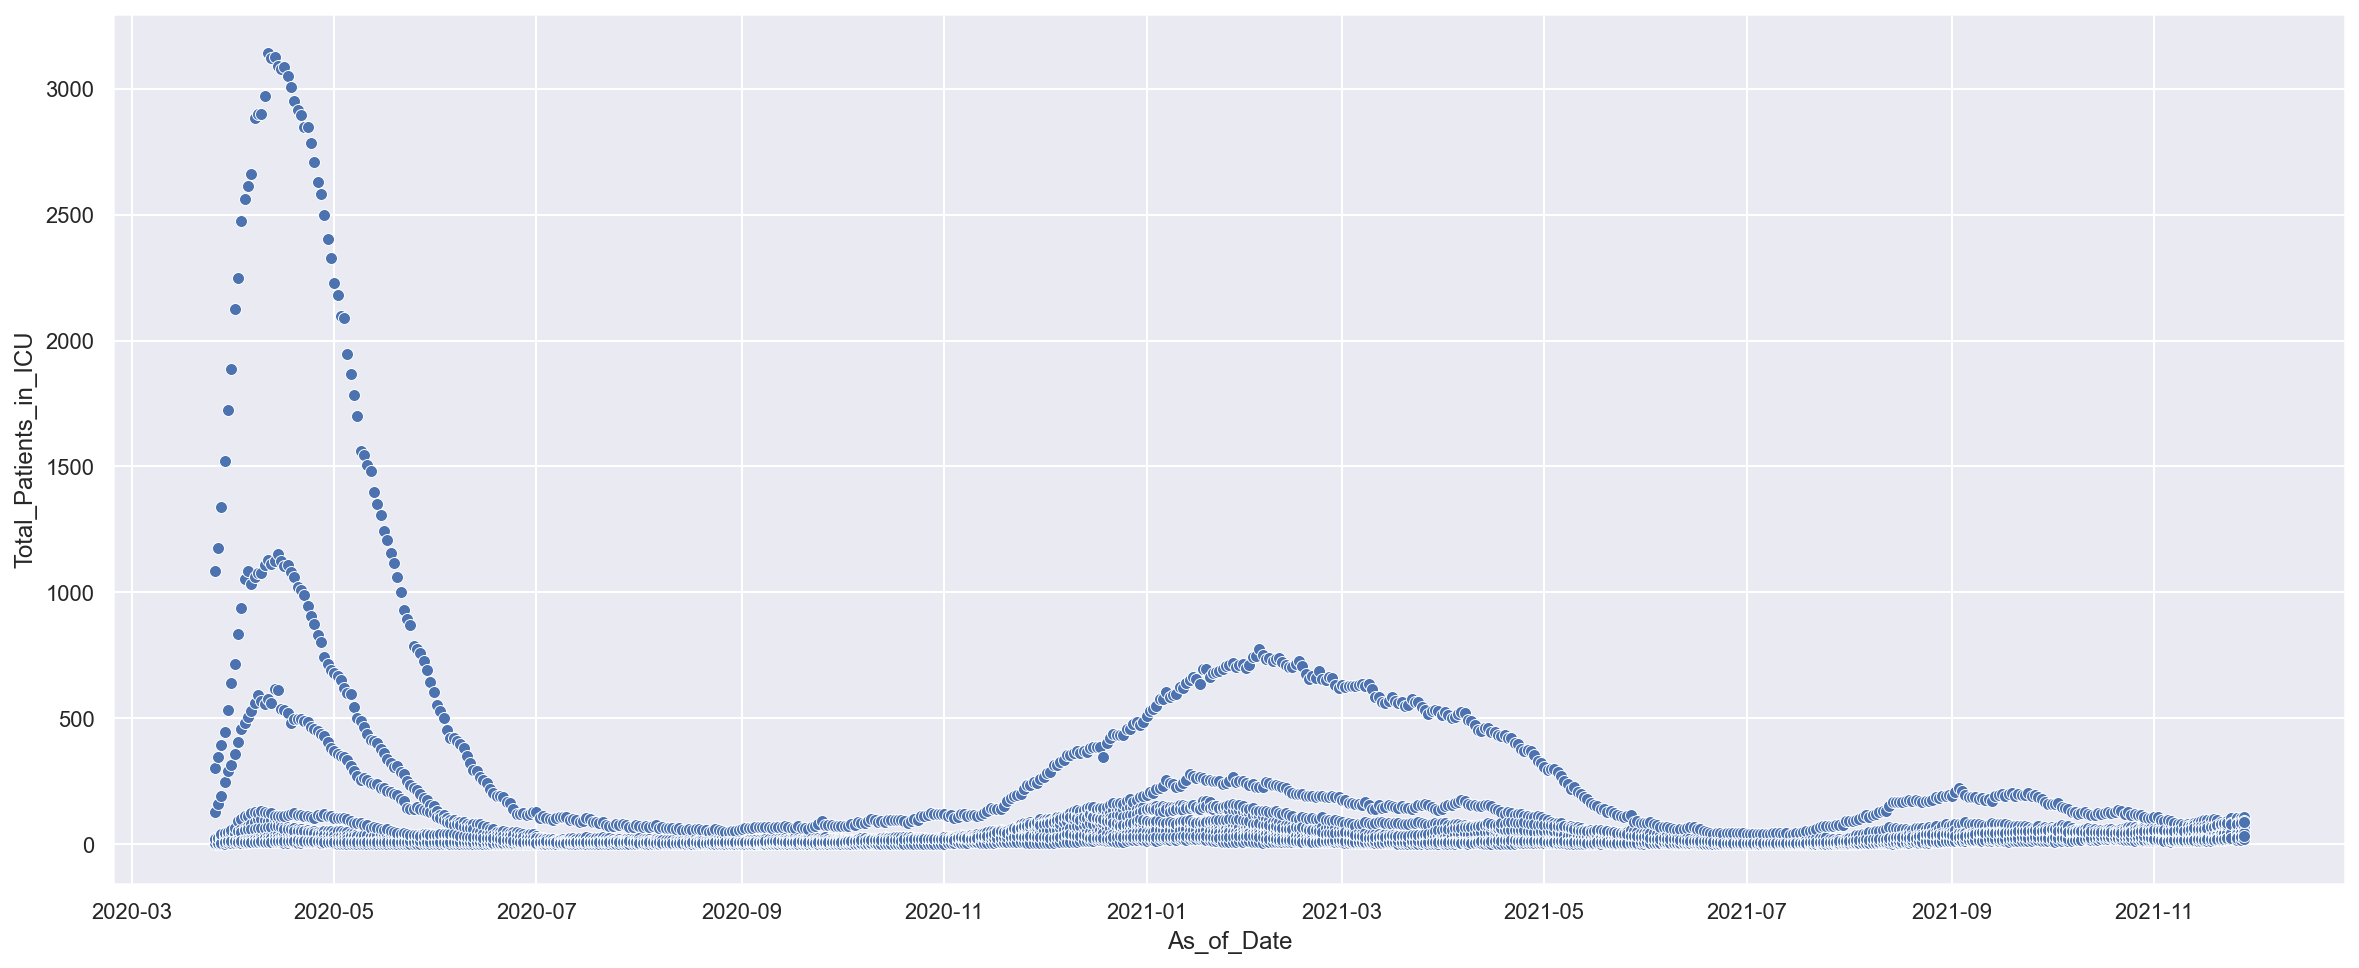

In [30]:
sns.scatterplot(x='As_of_Date', y='Total_Patients_in_ICU', data=df)

<AxesSubplot:xlabel='Region', ylabel='Total_Patients_in_ICU'>

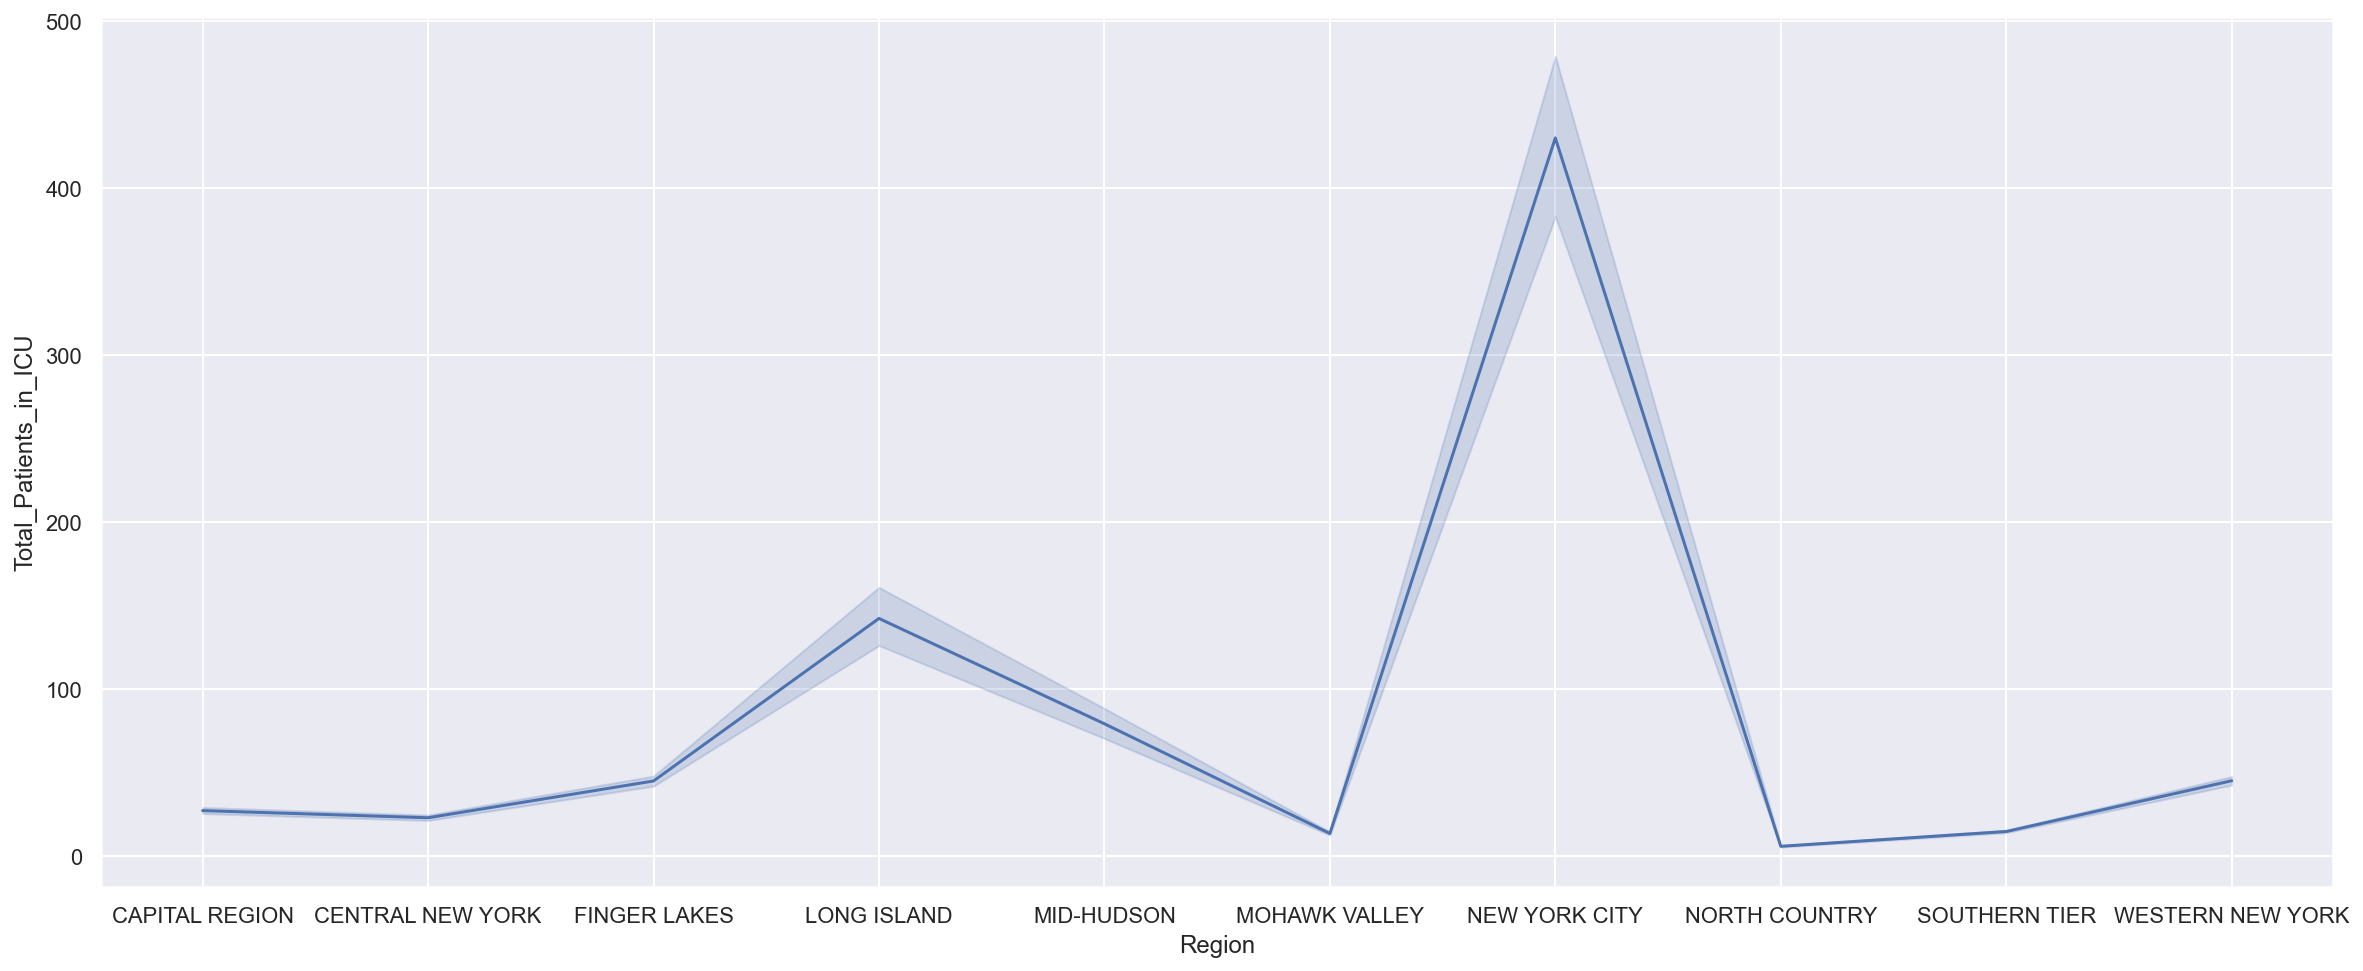

In [38]:
sns.lineplot(x='Region', y='Total_Patients_in_ICU', data=df)

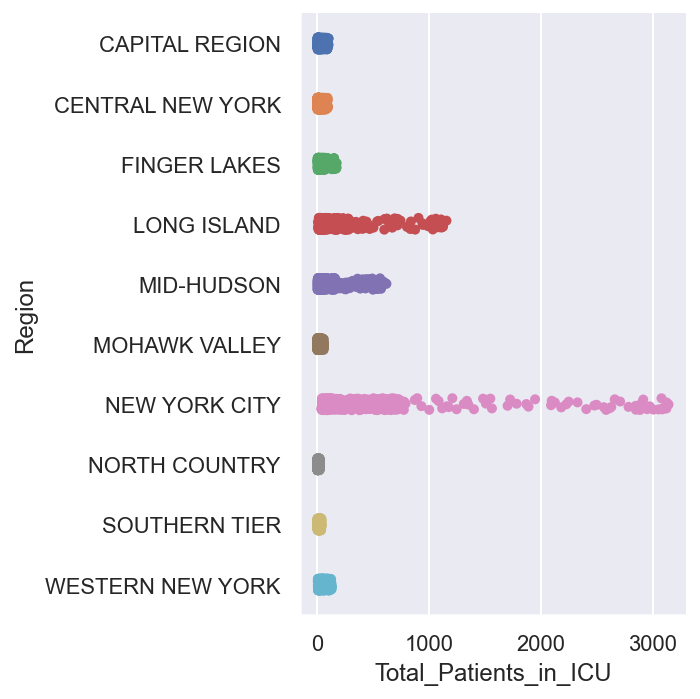

In [42]:
sns.catplot(x='Total_Patients_in_ICU', y='Region', data=df)

## Visualizing statistical relationships

/var/folders/q5/5vz10vwn1nddl7dyrsr89vdc0000gn/T/ipykernel_39068/1220835577.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


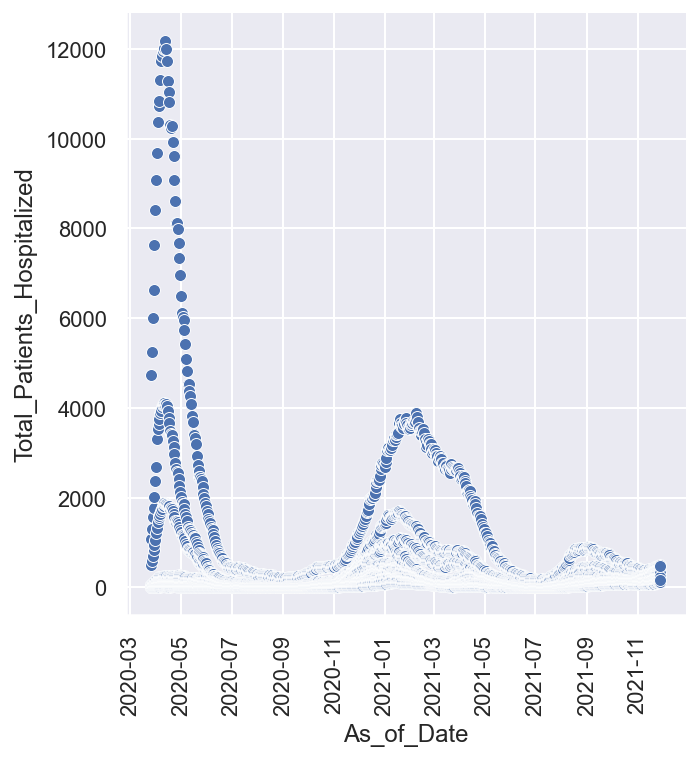

<Figure size 1080x576 with 0 Axes>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.relplot(x="As_of_Date", y="Total_Patients_Hospitalized", data=df);
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,8))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

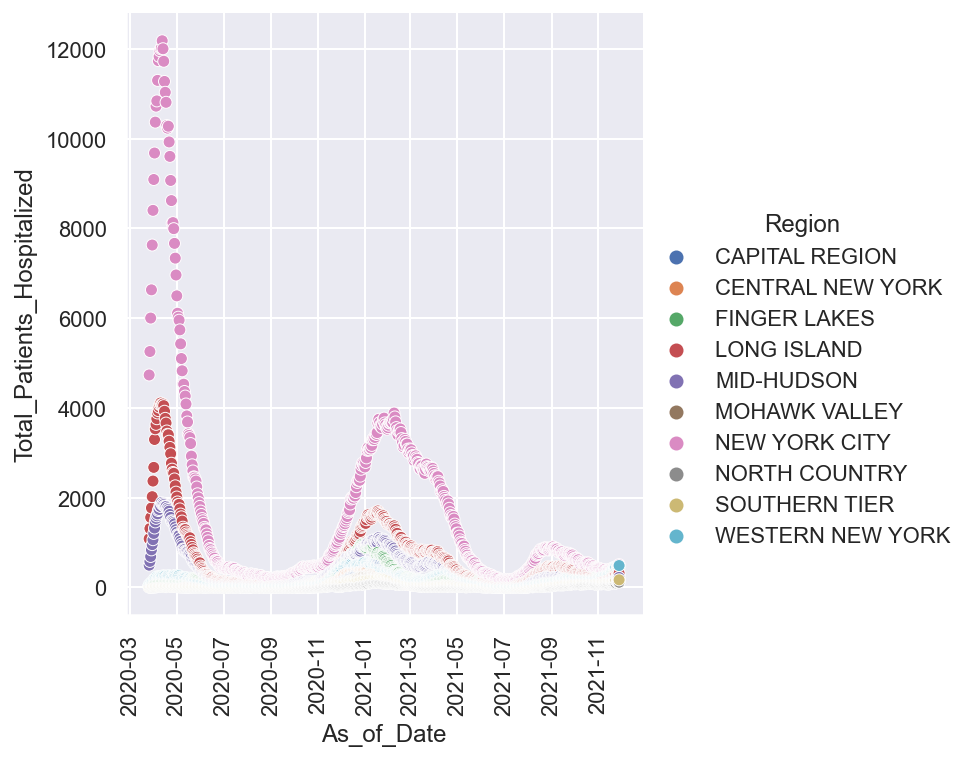

In [63]:
plot = sns.relplot(x="As_of_Date", y="Total_Patients_Hospitalized", hue="Region", data=df)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

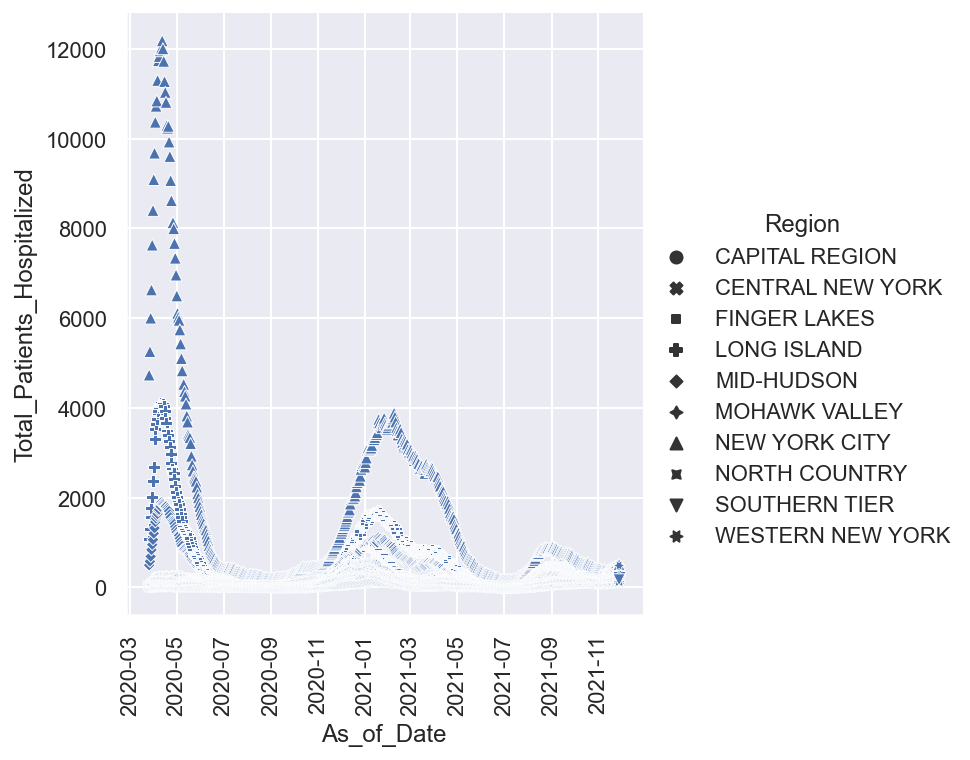

In [64]:
plot = sns.relplot(x="As_of_Date", y="Total_Patients_Hospitalized", style="Region", data=df)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

## Emphasizing continuity with line plots

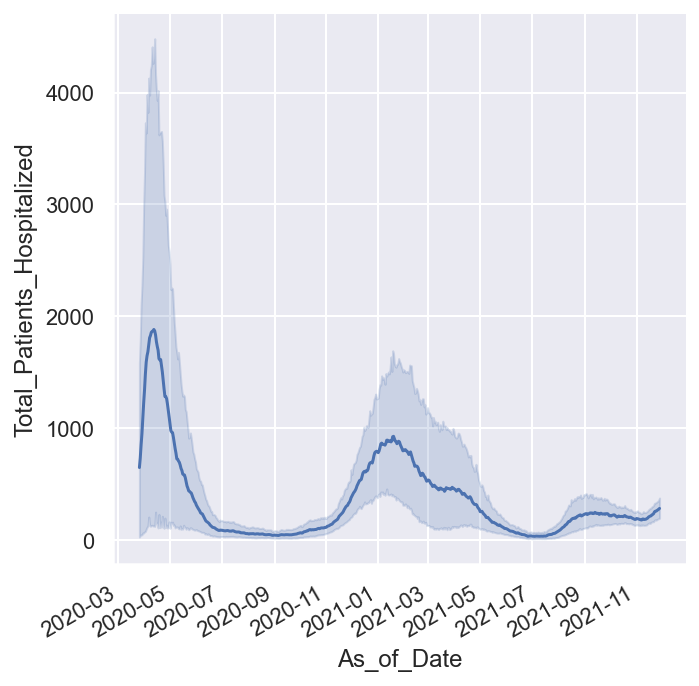

In [65]:
g = sns.relplot(x="As_of_Date", y="Total_Patients_Hospitalized", kind="line", data=df)
g.figure.autofmt_xdate()

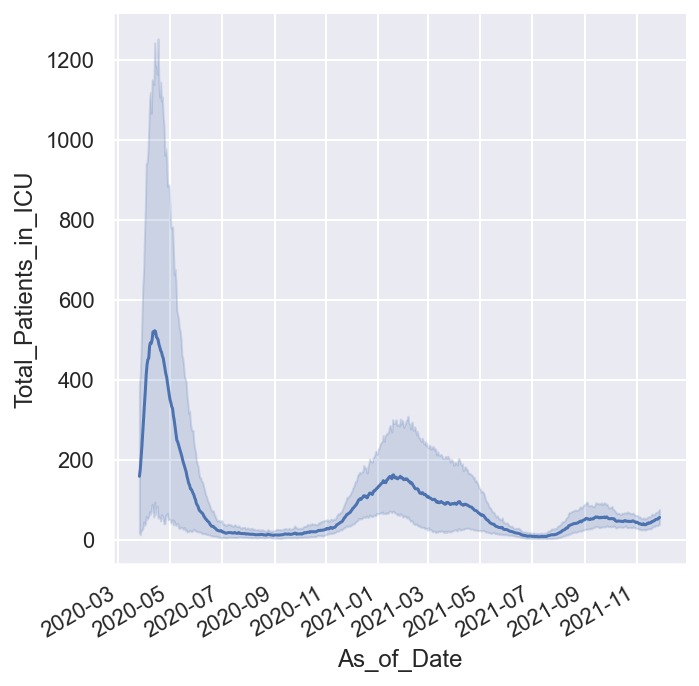

In [66]:
g = sns.relplot(x="As_of_Date", y="Total_Patients_in_ICU", kind="line", data=df)
g.figure.autofmt_xdate()

## Plotting the standard deviation instead of a confidence interval

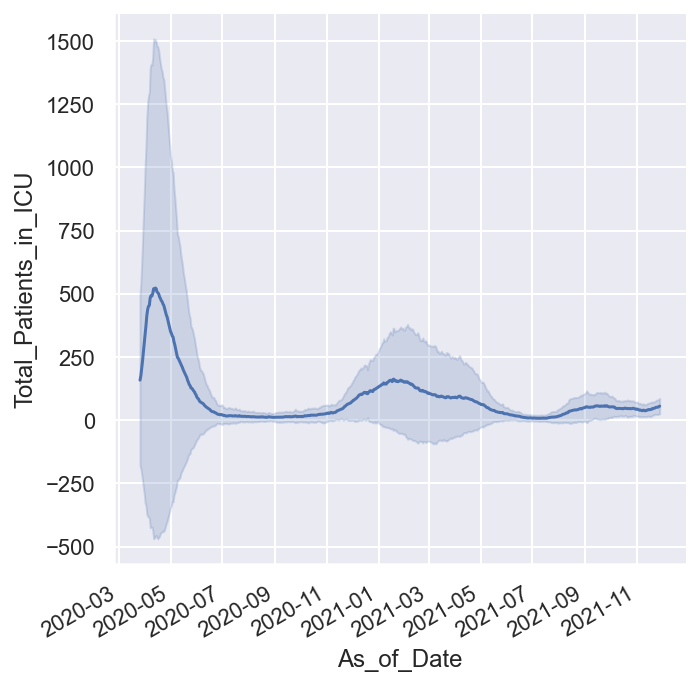

In [74]:
g = sns.relplot(x="As_of_Date", y="Total_Patients_in_ICU", kind="line", ci="sd", data=df)
g.figure.autofmt_xdate()

## Plotting subsets of data with semantic mappings

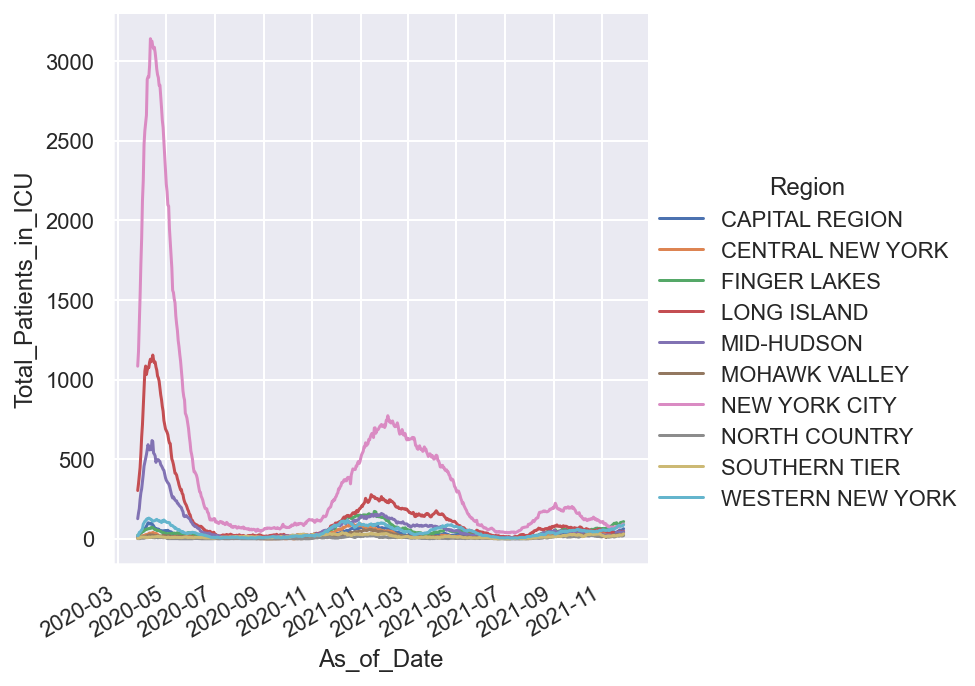

In [76]:
g = sns.relplot(x="As_of_Date", y="Total_Patients_in_ICU", hue="Region", kind="line", data=df);
g.figure.autofmt_xdate()

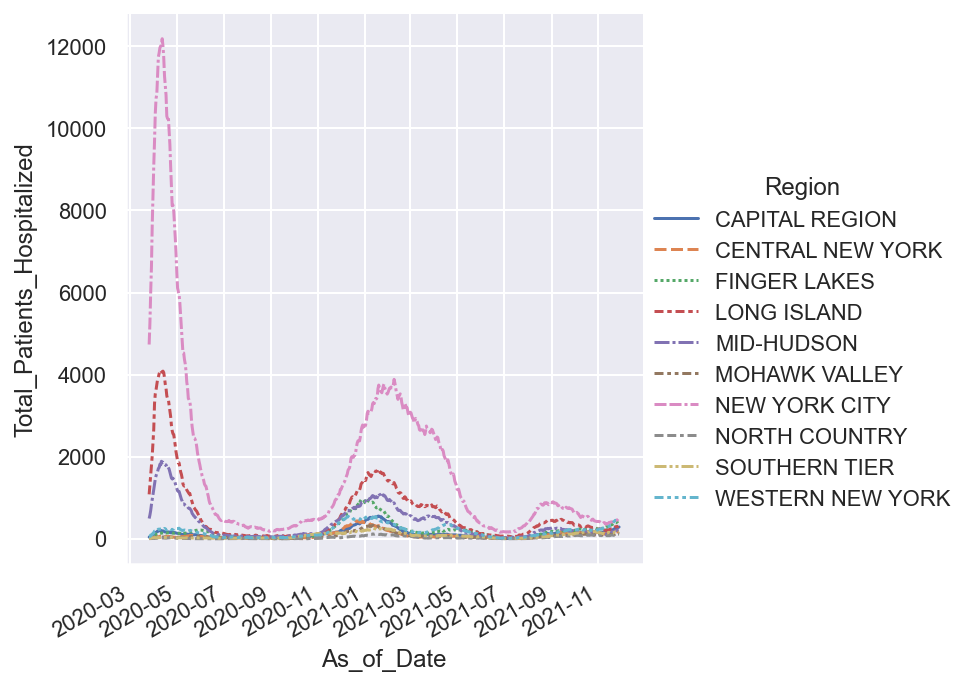

In [79]:
g = sns.relplot(x="As_of_Date", y="Total_Patients_Hospitalized", hue="Region", style="Region",
            kind="line", data=df);
g.figure.autofmt_xdate()

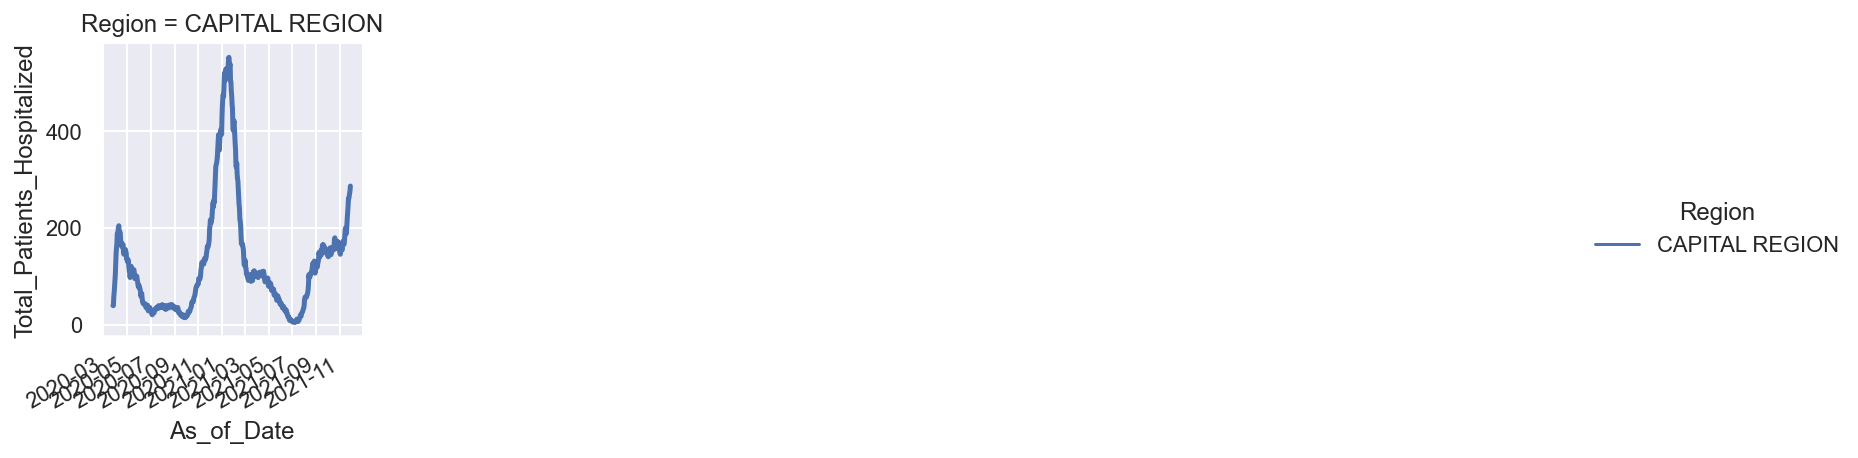

In [93]:
g = sns.relplot(x="As_of_Date", y="Total_Patients_Hospitalized", hue="Region", style="Region",
            col="Region", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df.query("Region == 'CAPITAL REGION'"));
g.figure.autofmt_xdate()